In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# 데이터 준비

In [2]:
# 패션 mnist 데이터셋 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
# 이미지 입력시에는 채널에 대한 정보가 있어야 함
# 지금은 Conv2D를 적용하기 위해서 채널 차원을 추가
scaled_train = x_train.reshape(-1, 28, 28, 1) / 255

In [5]:
x_train.shape, scaled_train.shape

((60000, 28, 28), (60000, 28, 28, 1))

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
scaled_train, scaled_val, y_train, y_val = train_test_split(scaled_train, y_train, test_size= 0.2, stratify= y_train, random_state= 20)

In [8]:
scaled_train.shape, scaled_val.shape

((48000, 28, 28, 1), (12000, 28, 28, 1))

# 합성곱 신경망 모델 구성

1. 합성곱 층으로 이미지에서 특징을 감지
2. 밀집층으로 클래스에 따른 분류 확률을 계산

In [9]:
model = keras.Sequential()

In [10]:
# 입력층 추가
model.add(keras.Input(shape = (28, 28, 1)))

# 합성곱 층 추가
model.add(keras.layers.Conv2D(32, kernel_size= 3, activation= "relu", padding= "same"))

- 패션 mnist 이미지가 (28, 28)크기에 세임 패딩을 적용, 32개의 필터 사용
  - 출력되는 특성맵의 크기는 (28, 28, 32)

In [11]:
# 폴링층 추가
model.add(keras.layers.MaxPool2D(2))

- (2, 2)크기의 커널을 이용하여 폴링을 적용해서 특성맵의 크기가 절반으로 줄어들고 특성맵의 깊이는 그대로
  - 출력되는 특성맵의 크기는(14, 14, 32)

In [12]:
# 두 번쨰 합성곱 - 폴링층 추가
model.add(keras.layers.Conv2D(64, kernel_size= 3, activation= "relu", padding = "same"))
model.add(keras.layers.MaxPool2D(2))

- (14, 14)크기의 세임 패딩, 64개 필터 사용
  - 출력되는 특성맵의 크기 (14, 14, 64)

- (2, 2)크기의 커널을 이용하여 폴링
  - 출력되는 특성맵의 크기 (7, 7, 64)

In [13]:
# 3차원 특성맵을 일렬로 펼침
# 10개의 유닛을 가진 밀집층에서 확률을 계산하기 떄문
model.add(keras.layers.Flatten())

In [14]:
# 밀집 은닉층을 하나 더 추가한 후 드롭아웃을 넣어 과대적합을 방지하고 성능을 개선
model.add(keras.layers.Dense(100, activation= "relu"))
model.add(keras.layers.Dropout(0, 4))

In [15]:
# 출력층
# 10개의 클래스를 분류하는 다중 분류
model.add(keras.layers.Dense(10, activation= "softmax"))

In [16]:
# 모델 구조 확인
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

- 파라미터 개수
  - 첫 번쨰 합성곱 층
    - 필터의 크기 : (3, 3, 1)
    - 필터의 개수 : 32
    - 3 * 3 * 1 * 32 + 32 = 320
  
  - 두 번쨰 합성곱 층
    - 필터의 크기 : (3, 3, 32)
    - 필터의 개수 : 64
    - 3 * 3 * 32 * 64 + 64 = 18496
  
  - 밀집 은닉층
    - Flatten 층에서(3136, ) 크기의 배열이 전달 (7 * 7 * 64)
    - 3136 * 100 + 100 = 313700
  
  - 출력층
    - 밀집 은닉층에서 (100, )크기의 배열이 전달
    - 100 * 10 + 10 = 1010

# 모델 훈련

- 옵티마이저 : Adam
- 콜백함수 : ModelCheckpoint, EarlyStopping

In [17]:
cp_nb = keras.callbacks.ModelCheckpoint("./model/best-cnn-model.keras", save_best_only= True)
es_nb = keras.callbacks.EarlyStopping(patience= 4, restore_best_weights=True)

In [18]:
model.compile(optimizer= "adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [19]:
history = model.fit(scaled_train, y_train, epochs= 30, validation_data=(scaled_val, y_val), callbacks= [cp_nb, es_nb], batch_size= 32)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7909 - loss: 0.5905 - val_accuracy: 0.8903 - val_loss: 0.3101
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8956 - loss: 0.2870 - val_accuracy: 0.8990 - val_loss: 0.2733
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9147 - loss: 0.2314 - val_accuracy: 0.9123 - val_loss: 0.2414
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9274 - loss: 0.1971 - val_accuracy: 0.9128 - val_loss: 0.2374
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9385 - loss: 0.1629 - val_accuracy: 0.9193 - val_loss: 0.2243
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9475 - loss: 0.1400 - val_accuracy: 0.9185 - val_loss: 0.2426
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9552 - loss: 0.1203 - val_accuracy: 0.9190 - val_loss: 0.2424
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9637 - loss: 0.0960 - 

# 훈련 로그 확인

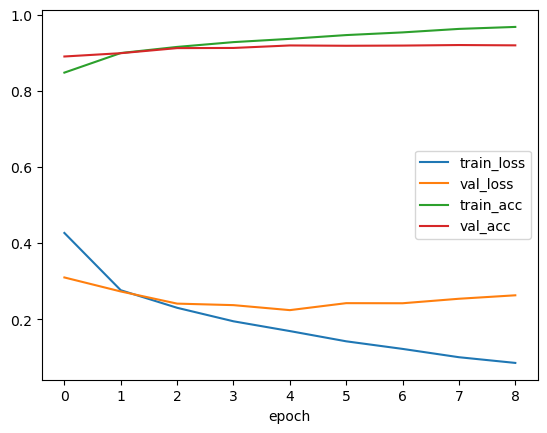

In [20]:
plt.figure()
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

# 모델 성능 검증

In [21]:
scaled_test = x_test.reshape(-1, 28, 28, 1) / 255

In [22]:
model.evaluate(scaled_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9127 - loss: 0.2545


[0.2444133758544922, 0.9143999814987183]

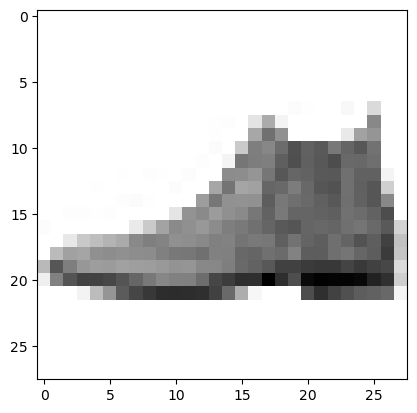

In [23]:
# 데이터 시각호
plt.imshow(scaled_test[0].reshape(28, 28), cmap= "gray_r")
plt.show()

In [24]:
preds = model.predict(scaled_test[[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [25]:
print(preds)

[[2.7809995e-06 5.3307213e-07 7.5617641e-07 2.0222447e-07 3.3649483e-06
  6.6790592e-05 1.0290954e-06 2.6195268e-03 1.6720091e-06 9.9730337e-01]]


TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

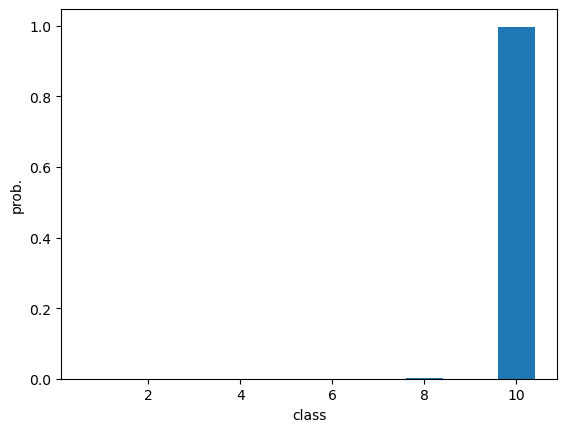

In [ ]:
plt.figure()
plt.bar(range(1, 11), preds[0])
plt.xlabel("class")
plt.ylabel("prob.")
plt.bar()

In [27]:
np.argmax(preds)

9

In [28]:
y_test[0]

9